# Introduction

The dataset is from kaggle you can view it and understand columns from this link
https://www.kaggle.com/lava18/google-play-store-apps


## Questions

- What is the most expensive app on the store.
- Which Genre has more apps.
- What is the average size of the free apps & paid apps.
- What is the 5 top expenisve apps that has rate of 5.
- How many apps that has more than 50K reviews.
- What is the average price of the apps for each genre with each installs numbers.
- How many apps have rating > 4.7 and what is thier avg price.
- How much google earned from the 5,000,000+ installed apps
- What is the max and min size for free and paid apps.
- is there a correlation between rating, Reviews, Size with the price of the app
- How many apps for each type for each content reading.
- How many apps that can work on android version 4

# Imports

In [524]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

# Load the data

In [525]:
df = pd.read_csv('data/googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Distinguish the features

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [527]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [528]:
df.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


# Check Duplicates

In [529]:
df.duplicated(subset=['App']).sum()

1181

In [530]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [531]:
df[df['App'] == 'Wunderlist: To-Do List & Tasks']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3502,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404617,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
3546,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device


In [532]:
df[df.duplicated(subset=['App'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [533]:
df[df['App'] == 'ZOOM Cloud Meetings']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up


In [534]:
df.drop_duplicates(subset=['App'], inplace=True)

In [535]:
df.duplicated().sum()

0

# Check Missing

In [536]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [537]:
df.isnull().mean()*100

App                0.000000
Category           0.000000
Rating            15.144928
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.010352
Price              0.000000
Content Rating     0.010352
Genres             0.000000
Last Updated       0.000000
Current Ver        0.082816
Android Ver        0.031056
dtype: float64

In [538]:
cols = df.columns.tolist()
cols

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [539]:
cols.remove('Rating')

In [540]:
cols

['App',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [541]:
df.dropna(subset=cols, inplace= True)

In [542]:
df.dropna(subset=['Current Ver', 'Android Ver', 'Content Rating', 'Type'], inplace= True)

In [543]:
df.isnull().mean()*100

App                0.00000
Category           0.00000
Rating            15.11194
Reviews            0.00000
Size               0.00000
Installs           0.00000
Type               0.00000
Price              0.00000
Content Rating     0.00000
Genres             0.00000
Last Updated       0.00000
Current Ver        0.00000
Android Ver        0.00000
dtype: float64

In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         9648 non-null   object 
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   object 
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [545]:
df.describe()

,Rating
count,8190.000000
mean,4.173321
std,0.536691
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [546]:
df.describe(include='O')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648
unique,9648,33,5328,457,20,2,92,6,118,1376,2817,33
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1828,591,1226,1416,8895,8895,7893,824,252,1054,2202


# Reviews

In [547]:
df.Reviews.unique()[100:200]

array(['2225', '4369', '8572', '964', '42050', '104', '17934', '601',
       '36', '187', '182', '30', '134', '74', '113715', '3595', '9315',
       '75', '38', '26834', '119', '2277', '2280', '184', '9', '77', '35',
       '364', '18', '473', '66', '3871', '257', '62', '2914724', '1857',
       '4478', '577550', '814080', '246315', '454060', '155446', '418',
       '22486', '203130', '1435', '116507', '1433233', '90468', '860',
       '363934', '87873', '17506', '1862', '2084', '47303', '19080',
       '161', '85842', '7831', '91615', '4620', '21336', '26875', '1778',
       '2709', '64513', '8342', '527', '1322', '1680', '2739', '1065',
       '233757', '2', '51269', '30105', '156', '114', '341157', '16129',
       '674730', '1254730', '85185', '32584', '217730', '70991',
       '1002861', '16589', '148945', '4458', '62272', '8941', '46353',
       '1279184', '88073', '67000', '159872', '30847', '188841'],
      dtype=object)

In [548]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [549]:
df.isnull().sum()

App                  0
Category             0
Rating            1458
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [550]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Variable Data
* varies with device

In [551]:
variable_data = df[(df.Size == 'Varies with device') | 
                (df['Current Ver'] == 'Varies with device') | 
                (df['Android Ver']== 'Varies with device')]
variable_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [552]:
# df.drop(variable_data.index, inplace=True)

In [553]:
df.describe(include='O')

,App,Category,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648
unique,9648,33,457,20,2,92,6,118,1376,2817,33
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1828,1226,1416,8895,8895,7893,824,252,1054,2202


# Size

In [554]:
for s in df['Size'].unique():
    print(s)

19M
14M
8.7M
25M
2.8M
5.6M
29M
33M
3.1M
28M
12M
20M
21M
37M
5.5M
17M
39M
31M
4.2M
7.0M
23M
6.0M
6.1M
4.6M
9.2M
5.2M
11M
24M
Varies with device
9.4M
15M
10M
1.2M
26M
8.0M
7.9M
56M
57M
35M
54M
201k
3.6M
5.7M
8.6M
2.4M
27M
2.7M
2.5M
16M
3.4M
8.9M
3.9M
2.9M
38M
32M
5.4M
18M
1.1M
2.2M
4.5M
9.8M
52M
9.0M
6.7M
30M
2.6M
7.1M
3.7M
22M
7.4M
6.4M
3.2M
8.2M
9.9M
4.9M
9.5M
5.0M
5.9M
13M
73M
6.8M
3.5M
4.0M
2.3M
7.2M
2.1M
42M
7.3M
9.1M
55M
23k
6.5M
1.5M
7.5M
51M
41M
48M
8.5M
46M
8.3M
4.3M
4.7M
3.3M
40M
7.8M
8.8M
6.6M
5.1M
61M
66M
79k
8.4M
118k
44M
695k
1.6M
6.2M
18k
53M
1.4M
3.0M
5.8M
3.8M
9.6M
45M
63M
49M
77M
4.4M
4.8M
70M
6.9M
9.3M
10.0M
8.1M
36M
84M
97M
2.0M
1.9M
1.8M
5.3M
47M
556k
526k
76M
7.6M
59M
9.7M
78M
72M
43M
7.7M
6.3M
334k
34M
93M
65M
79M
100M
58M
50M
68M
64M
67M
60M
94M
232k
99M
624k
95M
8.5k
41k
292k
80M
1.7M
74M
62M
69M
75M
98M
85M
82M
96M
87M
71M
86M
91M
81M
92M
83M
88M
704k
862k
899k
378k
266k
375k
1.3M
975k
980k
4.1M
89M
696k
544k
525k
920k
779k
853k
720k
713k
772k
318k
58k
241k
196k

In [555]:
size_ser = df.Size.copy()

In [556]:
def fix_size(s):
    if s.endswith('M'):
        return float(s[:-1])
    elif s.endswith('k'):
        return float(s[:-1]) / 1024
    else:
        return np.nan

In [557]:
# size_ser.apply(fix_size)

In [558]:
df['Size'] = df['Size'].apply(fix_size)

In [559]:
df.Size.isnull().sum()

1226

# Price

In [560]:
sign = df['Price'].unique().tolist()
set([sign[0] for sign in sign])

{'$', '0'}

In [561]:
for p in df['Price'].unique():
    print(p)

0
$4.99
$3.99
$6.99
$1.49
$2.99
$7.99
$5.99
$3.49
$1.99
$9.99
$7.49
$0.99
$9.00
$5.49
$10.00
$24.99
$11.99
$79.99
$16.99
$14.99
$1.00
$29.99
$12.99
$2.49
$10.99
$1.50
$19.99
$15.99
$33.99
$74.99
$39.99
$3.95
$4.49
$1.70
$8.99
$2.00
$3.88
$25.99
$399.99
$17.99
$400.00
$3.02
$1.76
$4.84
$4.77
$1.61
$2.50
$1.59
$6.49
$1.29
$5.00
$13.99
$299.99
$379.99
$37.99
$18.99
$389.99
$19.90
$8.49
$1.75
$14.00
$4.85
$46.99
$109.99
$154.99
$3.08
$2.59
$4.80
$1.96
$19.40
$3.90
$4.59
$15.46
$3.04
$4.29
$2.60
$3.28
$4.60
$28.99
$2.95
$2.90
$1.97
$200.00
$89.99
$2.56
$30.99
$3.61
$394.99
$1.26
$1.20
$1.04


In [562]:
'Abdo'.startswith('A')

True

In [563]:
def fix_price(p):
    if p.startswith('$'):
        return float(p[1:])
    else:
        return 0.0

In [564]:
df['Price'] = df['Price'].apply(fix_price)

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            8422 non-null   float64
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [566]:
df.describe()

,Rating,Reviews,Size,Price
count,8190.000000,9.648000e+03,8422.000000,9648.000000
mean,4.173321,2.168369e+05,20.413556,1.100193
std,0.536691,1.832349e+06,21.833485,16.861727
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,2.500000e+01,4.600000,0.000000
50%,4.300000,9.690000e+02,12.000000,0.000000
75%,4.500000,2.944925e+04,28.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


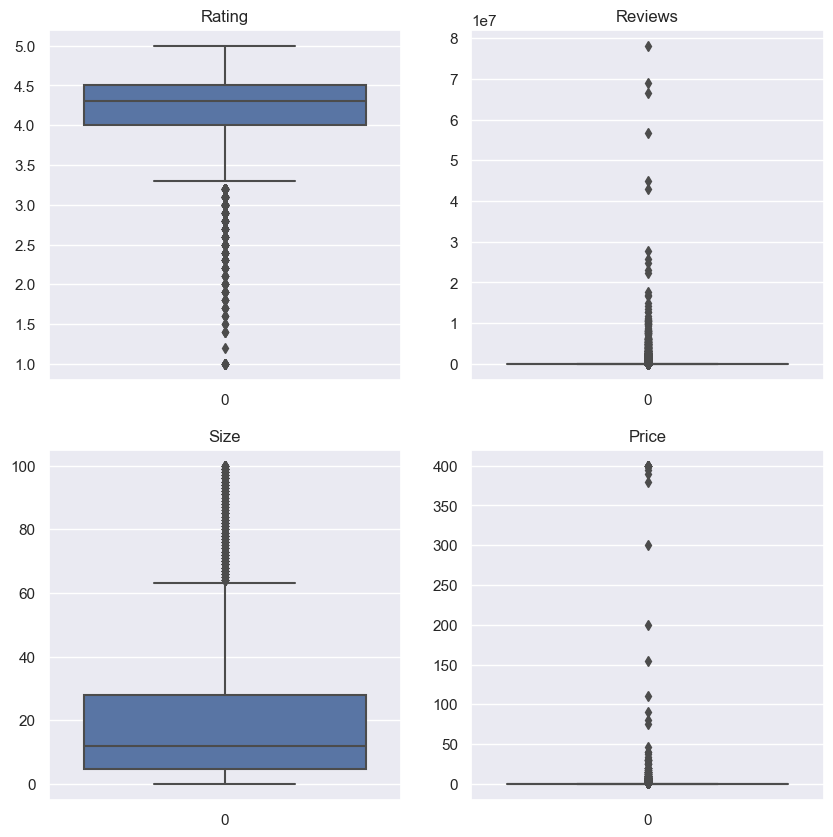

In [567]:
# Subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i, feature in enumerate(['Rating', 'Reviews', 'Size', 'Price']):
    sns.boxplot(df[feature], ax=ax[i//2][i%2])
    ax[i//2][i%2].set_title(feature)
plt.show()


# Category

In [568]:
for c in df['Category'].unique():
    print(c)

ART_AND_DESIGN
AUTO_AND_VEHICLES
BEAUTY
BOOKS_AND_REFERENCE
BUSINESS
COMICS
COMMUNICATION
DATING
EDUCATION
ENTERTAINMENT
EVENTS
FINANCE
FOOD_AND_DRINK
HEALTH_AND_FITNESS
HOUSE_AND_HOME
LIBRARIES_AND_DEMO
LIFESTYLE
GAME
FAMILY
MEDICAL
SOCIAL
SHOPPING
PHOTOGRAPHY
SPORTS
TRAVEL_AND_LOCAL
TOOLS
PERSONALIZATION
PRODUCTIVITY
PARENTING
WEATHER
VIDEO_PLAYERS
NEWS_AND_MAGAZINES
MAPS_AND_NAVIGATION


In [569]:
df['Category'] = df['Category'].apply(lambda c: c.lower())

for c in df['Category'].unique():
    print(c)

art_and_design
auto_and_vehicles
beauty
books_and_reference
business
comics
communication
dating
education
entertainment
events
finance
food_and_drink
health_and_fitness
house_and_home
libraries_and_demo
lifestyle
game
family
medical
social
shopping
photography
sports
travel_and_local
tools
personalization
productivity
parenting
weather
video_players
news_and_magazines
maps_and_navigation


In [570]:
for c in df['Installs'].unique():
    print(c)

10,000+
500,000+
5,000,000+
50,000,000+
100,000+
50,000+
1,000,000+
10,000,000+
5,000+
100,000,000+
1,000,000,000+
1,000+
500,000,000+
50+
100+
500+
10+
1+
5+
0+


In [571]:
for c in df['Type'].unique():
    print(c)

Free
Paid


In [572]:
for c in df['Content Rating'].unique():
    print(c)

Everyone
Teen
Everyone 10+
Mature 17+
Adults only 18+
Unrated


In [573]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,art_and_design,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,art_and_design,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,family,4.5,38,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,family,5.0,4,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,medical,NaN,3,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,books_and_reference,4.5,114,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [574]:
df.drop(['Genres', 'Last Updated', 'Current Ver'], axis=1, inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19.0,"10,000+",Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,art_and_design,3.9,967,14.0,"500,000+",Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,art_and_design,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8,"100,000+",Free,0.0,Everyone,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,family,4.5,38,53.0,"5,000+",Free,0.0,Everyone,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,family,5.0,4,3.6,100+,Free,0.0,Everyone,4.1 and up
10838,Parkinson Exercices FR,medical,NaN,3,9.5,"1,000+",Free,0.0,Everyone,2.2 and up
10839,The SCP Foundation DB fr nn5n,books_and_reference,4.5,114,NaN,"1,000+",Free,0.0,Mature 17+,Varies with device


In [575]:
for v in df['Android Ver'].unique():
    print(v)

4.0.3 and up
4.2 and up
4.4 and up
2.3 and up
3.0 and up
4.1 and up
4.0 and up
2.3.3 and up
Varies with device
2.2 and up
5.0 and up
6.0 and up
1.6 and up
1.5 and up
2.1 and up
7.0 and up
5.1 and up
4.3 and up
4.0.3 - 7.1.1
2.0 and up
3.2 and up
4.4W and up
7.1 and up
7.0 - 7.1.1
8.0 and up
5.0 - 8.0
3.1 and up
2.0.1 and up
4.1 - 7.1.1
5.0 - 6.0
1.0 and up
2.2 - 7.1.1
5.0 - 7.1.1


In [576]:
df['Android Ver'].value_counts()

4.1 and up            2202
4.0.3 and up          1395
4.0 and up            1283
Varies with device     989
4.4 and up             818
2.3 and up             615
5.0 and up             512
4.2 and up             371
2.3.3 and up           273
2.2 and up             239
3.0 and up             230
4.3 and up             221
2.1 and up             133
1.6 and up             115
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              31
5.1 and up              22
1.5 and up              19
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [513]:
def check_ver_4(version):
    if version == 'Varies with device':
        return np.nan
    elif version.startswith('4'):
        return 'True'
    else:
        return 'False'

In [577]:
# def check_ver_4(version):
#     try:
#         if version.startswith('4'):
#             return 'Yes'
#         else:
#             return 'No'
#     except:
#         return np.nan

In [578]:
df['is_working_on_ver_4'] = df['Android Ver'].apply(check_ver_4)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,is_working_on_ver_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19.0,"10,000+",Free,0.0,Everyone,4.0.3 and up,True
1,Coloring book moana,art_and_design,3.9,967,14.0,"500,000+",Free,0.0,Everyone,4.0.3 and up,True
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,4.0.3 and up,True
3,Sketch - Draw & Paint,art_and_design,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,4.2 and up,True
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8,"100,000+",Free,0.0,Everyone,4.4 and up,True
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,family,4.5,38,53.0,"5,000+",Free,0.0,Everyone,4.1 and up,True
10837,Fr. Mike Schmitz Audio Teachings,family,5.0,4,3.6,100+,Free,0.0,Everyone,4.1 and up,True
10838,Parkinson Exercices FR,medical,NaN,3,9.5,"1,000+",Free,0.0,Everyone,2.2 and up,False
10839,The SCP Foundation DB fr nn5n,books_and_reference,4.5,114,NaN,"1,000+",Free,0.0,Mature 17+,Varies with device,NaN


In [579]:
df.drop('Android Ver', axis=1, inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_working_on_ver_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19.0,"10,000+",Free,0.0,Everyone,True
1,Coloring book moana,art_and_design,3.9,967,14.0,"500,000+",Free,0.0,Everyone,True
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,True
3,Sketch - Draw & Paint,art_and_design,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,True
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8,"100,000+",Free,0.0,Everyone,True
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,family,4.5,38,53.0,"5,000+",Free,0.0,Everyone,True
10837,Fr. Mike Schmitz Audio Teachings,family,5.0,4,3.6,100+,Free,0.0,Everyone,True
10838,Parkinson Exercices FR,medical,NaN,3,9.5,"1,000+",Free,0.0,Everyone,False
10839,The SCP Foundation DB fr nn5n,books_and_reference,4.5,114,NaN,"1,000+",Free,0.0,Mature 17+,NaN


In [580]:
df.isna().sum()

App                       0
Category                  0
Rating                 1458
Reviews                   0
Size                   1226
Installs                  0
Type                      0
Price                     0
Content Rating            0
is_working_on_ver_4     989
dtype: int64

In [581]:
df['is_working_on_ver_4'].value_counts()

True     6304
False    2355
Name: is_working_on_ver_4, dtype: int64

In [582]:
df['is_working_on_ver_4'].value_counts().sum()

8659

In [583]:
df['is_working_on_ver_4'].shape

(9648,)

In [585]:
df['is_working_on_ver_4'].unique()

array(['True', 'False', nan], dtype=object)

In [595]:
ver = df['is_working_on_ver_4'].copy()

ver.mode()[0]

'True'

In [596]:
# Impute Using Pandas
# ver.fillna(ver.mode()[0], inplace=True)

In [597]:
# Impute Using Sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
ver = imputer.fit_transform(ver.values.reshape(-1, 1))

In [599]:
ver = pd.Series(ver.reshape(-1))
ver.value_counts()

True     7512
False    2136
dtype: int64

In [604]:
ver.isna().sum()

0

In [609]:
df['is_working_on_ver_4'] = imputer.fit_transform(df['is_working_on_ver_4'].values.reshape(-1, 1))

In [611]:
df['is_working_on_ver_4'].isna().sum()

0

In [612]:
df.isna().sum()

App                       0
Category                  0
Rating                 1458
Reviews                   0
Size                   1226
Installs                  0
Type                      0
Price                     0
Content Rating            0
is_working_on_ver_4       0
dtype: int64

In [616]:
df.Rating.mean(), df.Rating.median()

(4.173321123321126, 4.3)

In [617]:
df.Size.mean(), df.Size.median()

(20.413555770507987, 12.0)

In [620]:
df.groupby('Category')['Size'].mean()

Category
art_and_design         12.529508
auto_and_vehicles      20.036807
beauty                 13.795745
books_and_reference    13.198780
business               13.866891
comics                 13.794456
communication          11.306306
dating                 15.661117
education              19.056816
entertainment          23.043750
events                 13.963617
family                 27.222655
finance                17.367863
food_and_drink         20.494318
game                   41.866570
health_and_fitness     20.669296
house_and_home         15.970010
libraries_and_demo     10.731202
lifestyle              14.844516
maps_and_navigation    16.367773
medical                19.188756
news_and_magazines     12.470153
parenting              22.512963
personalization        11.250664
photography            15.666053
productivity           12.341952
shopping               15.490994
social                 15.983868
sports                 24.058153
tools                   8.793753
t

In [621]:
df.groupby('Installs')['Rating'].mean()

Installs
0+                     NaN
1+                5.000000
1,000+            4.062644
1,000,000+        4.216478
1,000,000,000+    4.215000
10+               4.624638
10,000+           4.035091
10,000,000+       4.299146
100+              4.363696
100,000+          4.116453
100,000,000+      4.386702
5+                4.611111
5,000+            4.023349
5,000,000+        4.227677
50+               4.419643
50,000+           4.045175
50,000,000+       4.333663
500+              4.177889
500,000+          4.168390
500,000,000+      4.375000
Name: Rating, dtype: float64

In [622]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df[['Rating', 'Size']] = imputer.fit_transform(df[['Rating', 'Size']])

In [623]:
df.isna().sum()

App                    0
Category               0
Rating                 0
Reviews                0
Size                   0
Installs               0
Type                   0
Price                  0
Content Rating         0
is_working_on_ver_4    0
dtype: int64

In [ ]:
df.Size.describe()

count    9648.000000
mean       21.368141
std        21.169715
min         0.008301
25%         5.200000
50%        14.000000
75%        28.800000
max       100.000000
Name: Size, dtype: float64

# Questions

## What is the most expensive app on the store.


In [ ]:
df[  df['Price'] == df['Price'].max()  ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_working_on_ver_4
4367,I'm Rich - Trump Edition,lifestyle,3.6,275,7.3,"10,000+",Paid,400.0,Everyone,Yes


In [ ]:
most_expensive_app = df[  df['Price'] == df['Price'].max()  ]['App'].iloc[0]
print('Most expensive app:', most_expensive_app)

Most expensive app: I'm Rich - Trump Edition


## Which Category has more apps.


In [ ]:
df['Category'].value_counts().nlargest(10)

family             1828
game                959
tools               825
business            420
medical             395
productivity        374
personalization     374
lifestyle           369
finance             345
sports              325
Name: Category, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

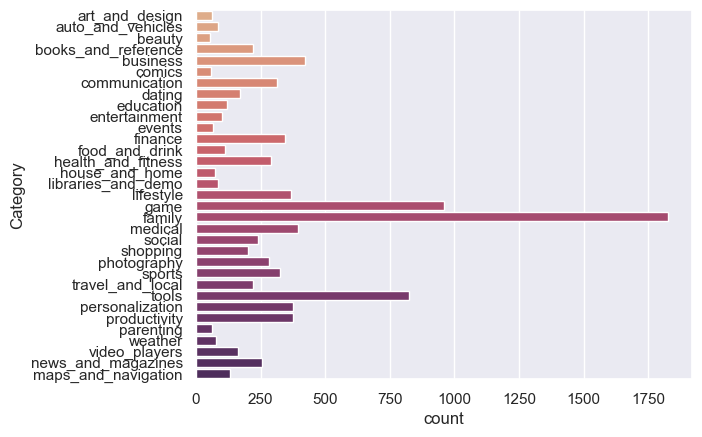

In [ ]:
sns.countplot(y='Category', data=df, palette='flare')

In [ ]:
# sorted bar chart plotly
px.bar(df, y='Category', title='Rating by Category and Content Rating')

In [ ]:
fig = px.bar(df, y='Category', title='Rating by Category and Content Rating')
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

In [ ]:
top10_cat = df['Category'].value_counts().nlargest(10).reset_index()
top10_cat

,index,Category
0,family,1828
1,game,959
2,tools,825
3,business,420
4,medical,395
5,productivity,374
6,personalization,374
7,lifestyle,369
8,finance,345
9,sports,325


In [ ]:
fig = px.bar(top10_cat, x='Category', y='index', title='Top 10 Categories')
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

## What is the average size of the free apps & paid apps.


In [ ]:
df.groupby('Type').mean()['Size']

Type
Free    21.486403
Paid    19.971146
Name: Size, dtype: float64

<Axes: >

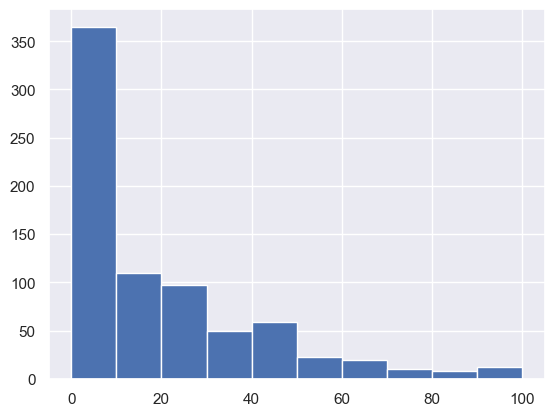

In [625]:
df[df.Type == 'Paid']['Size'].hist()

<Axes: xlabel='Type', ylabel='Size'>

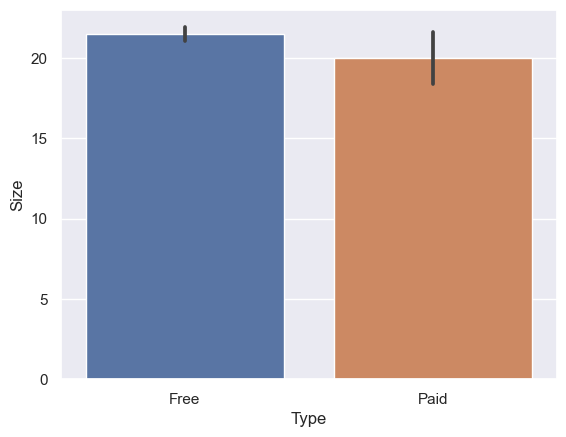

In [ ]:
sns.barplot(x='Type', y='Size', data=df, estimator=np.mean)

## What is the average size of the apps in every category.


In [ ]:
df.groupby('Category').mean()['Size']

Category
art_and_design         12.813016
auto_and_vehicles      21.631885
beauty                 14.038174
books_and_reference    15.970712
business               15.097947
comics                 15.917107
communication          15.265737
dating                 15.811898
education              21.589360
entertainment          23.342792
events                 14.933802
family                 27.178458
finance                18.505725
food_and_drink         22.210063
game                   40.821255
health_and_fitness     23.077799
house_and_home         18.526544
libraries_and_demo     10.674606
lifestyle              15.831792
maps_and_navigation    18.178425
medical                19.671237
news_and_magazines     14.309975
parenting              22.334333
personalization        12.727171
photography            19.194297
productivity           16.423227
shopping               17.364544
social                 18.356931
sports                 24.593613
tools                  11.137107
t

In [ ]:
df.groupby('Category').mean()['Size'].nlargest(10)

Category
game                  40.821255
family                27.178458
travel_and_local      24.636467
sports                24.593613
entertainment         23.342792
health_and_fitness    23.077799
parenting             22.334333
food_and_drink        22.210063
auto_and_vehicles     21.631885
education             21.589360
Name: Size, dtype: float64

## What is the 5 top expenisve apps that has rate of 5.


In [626]:
df[  df['Rating'] == 5  ].nlargest(5, 'Price')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_working_on_ver_4
5489,AP Art History Flashcards,family,5.0,1,96.000000,10+,Paid,29.99,Mature 17+,True
7477,USMLE Step 2 CK Flashcards,family,5.0,1,40.000000,10+,Paid,19.99,Everyone,True
5246,Hey AJ! It's Bedtime!,family,5.0,1,63.000000,10+,Paid,4.99,Everyone,True
5482,meStudying: AP English Lit,family,5.0,1,0.639648,10+,Paid,4.99,Everyone,False
7204,TI-84 CE Graphing Calculator Manual TI 84,family,5.0,1,27.000000,100+,Paid,4.99,Everyone,False


In [630]:
df[  df['Rating'] == 5  ].sort_values(by='Price', ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_working_on_ver_4
5489,AP Art History Flashcards,family,5.0,1,96.000000,10+,Paid,29.99,Mature 17+,True
7477,USMLE Step 2 CK Flashcards,family,5.0,1,40.000000,10+,Paid,19.99,Everyone,True
5246,Hey AJ! It's Bedtime!,family,5.0,1,63.000000,10+,Paid,4.99,Everyone,True
5482,meStudying: AP English Lit,family,5.0,1,0.639648,10+,Paid,4.99,Everyone,False
7204,TI-84 CE Graphing Calculator Manual TI 84,family,5.0,1,27.000000,100+,Paid,4.99,Everyone,False


In [641]:
df[  df['Rating'] == 5  ].nlargest(5, 'Price')['App'].tolist()

['AP Art History Flashcards',
 'USMLE Step 2 CK Flashcards',
 "Hey AJ! It's Bedtime!",
 'meStudying: AP English Lit',
 'TI-84 CE Graphing Calculator Manual TI 84']

## How many apps that has more than 50K reviews.


In [642]:
df[  df['Reviews'] > 50000  ].count()['App']

1945

## What is the average price of the apps for each category with each installs numbers.


In [647]:
df.groupby(['Category', 'Installs']).mean()['Price'].reset_index()

,Category,Installs,Price
0,art_and_design,0+,0.000000
1,art_and_design,"1,000+",0.663333
2,art_and_design,"1,000,000+",0.000000
3,art_and_design,"10,000+",0.180909
4,art_and_design,"10,000,000+",0.000000
...,...,...,...
507,weather,"5,000,000+",0.000000
508,weather,"50,000+",0.000000
509,weather,"50,000,000+",0.000000
510,weather,500+,1.660000


In [649]:
df.Installs.value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
Name: Installs, dtype: int64

In [ ]:
x = pd.pivot_table(index='Category', columns='Installs', values='Price', data=df, aggfunc=np.mean)
x

Installs,0+,1+,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,"100,000+","100,000,000+",5+,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Category,,,,,,,,,,,,,,,,,,,,
art_and_design,0.000,NaN,0.663333,0.000000,NaN,NaN,0.180909,0.000000,0.000000,0.000000,NaN,NaN,0.497500,0.0,NaN,0.000000,0.0,NaN,0.000000,NaN
auto_and_vehicles,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.248333,0.000000,NaN,0.000000,0.000000,0.0,9.990000,0.398000,NaN,0.000000,0.000000,NaN
beauty,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,NaN
books_and_reference,NaN,5.990000,0.153636,0.000000,0.0,3.996842,0.179600,0.000000,0.570000,0.000000,0.0,1.852857,0.474375,0.0,0.583333,0.000000,NaN,0.220000,0.000000,NaN
business,0.000,0.000000,0.183265,0.000000,NaN,2.201905,0.065000,0.000000,0.432763,0.332667,0.0,0.055000,0.000000,0.0,0.359600,0.000000,0.0,0.782174,0.000000,NaN
comics,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,NaN,0.000000,NaN
communication,NaN,0.000000,0.294091,0.072927,0.0,1.392105,0.478400,0.000000,0.210606,0.572632,0.0,0.000000,0.393158,0.0,0.000000,0.000000,0.0,0.906364,0.000000,0.0
dating,NaN,0.000000,0.537692,0.000000,NaN,0.000000,0.190000,0.000000,0.880588,0.000000,NaN,0.000000,0.000000,0.0,0.248333,0.000000,NaN,0.000000,0.000000,NaN
education,NaN,NaN,4.990000,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.190000,0.0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.306923,NaN


## How many apps have rating > 4.7 and what is thier avg price.


In [ ]:
df[  df['Rating'] > 4.7  ].count()['App']

577

In [ ]:
df[  df['Rating'] > 4.7  ]['Price'].mean()

0.46209705372617016

## How much google earned from the 5,000,000+ installed apps


In [ ]:
df.groupby('Installs').sum()['Price']

Installs
0+                1205.41
1+                 179.29
1,000+            2415.18
1,000,000+          53.30
1,000,000,000+       0.00
10+                446.77
10,000+           2374.41
10,000,000+          7.98
100+               799.78
100,000+           782.56
100,000,000+         0.00
5+                  71.38
5,000+            1416.98
5,000,000+           0.00
50+                109.72
50,000+            582.89
50,000,000+          0.00
500+               134.62
500,000+            34.39
500,000,000+         0.00
Name: Price, dtype: float64

In [654]:
df[(df.Installs == '5,000,000+') & (df.Type == 'Paid')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_working_on_ver_4


In [655]:
df.groupby('Installs').sum()['Price']

Installs
0+                1205.41
1+                 179.29
1,000+            2415.18
1,000,000+          53.30
1,000,000,000+       0.00
10+                446.77
10,000+           2374.41
10,000,000+          7.98
100+               799.78
100,000+           782.56
100,000,000+         0.00
5+                  71.38
5,000+            1416.98
5,000,000+           0.00
50+                109.72
50,000+            582.89
50,000,000+          0.00
500+               134.62
500,000+            34.39
500,000,000+         0.00
Name: Price, dtype: float64

In [ ]:
df.groupby('Installs').sum()['Price'].loc['5,000,000+']

0.0

## What is the max and min size for free and paid apps.


In [ ]:
df.groupby('Type').describe()['Size']

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,8895.0,21.486403,21.108291,0.008301,5.4,14.12,28.8,100.0
Paid,753.0,19.971146,21.848264,0.013672,3.3,11.00,28.8,100.0


In [656]:
df.groupby('Type').agg(['min', 'max', 'mean'])['Size']

C:\Users\ahmad\AppData\Local\Temp\ipykernel_25376\811910005.py:1: FutureWarning:

['App', 'Category', 'Installs', 'Content Rating', 'is_working_on_ver_4'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,min,max,mean
Type,,,
Free,0.008301,100.0,21.486403
Paid,0.013672,100.0,19.971146


<Axes: xlabel='Type', ylabel='Size'>

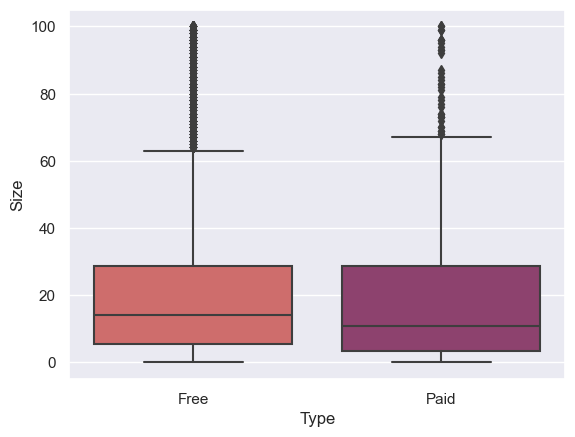

In [ ]:
sns.boxplot(x='Type', y='Size', data=df, palette='flare')

## is there a correlation between rating, Reviews, Size with the price of the app


In [ ]:
df.corr()

,Rating,Reviews,Size,Price
Rating,1.000000,0.054221,0.093270,-0.017430
Reviews,0.054221,1.000000,0.106167,-0.007604
Size,0.093270,0.106167,1.000000,-0.023944
Price,-0.017430,-0.007604,-0.023944,1.000000


In [ ]:
# is there a correlation between rating, Reviews, Size with the price of the app
df.corr()['Price']

Rating    -0.017430
Reviews   -0.007604
Size      -0.023944
Price      1.000000
Name: Price, dtype: float64

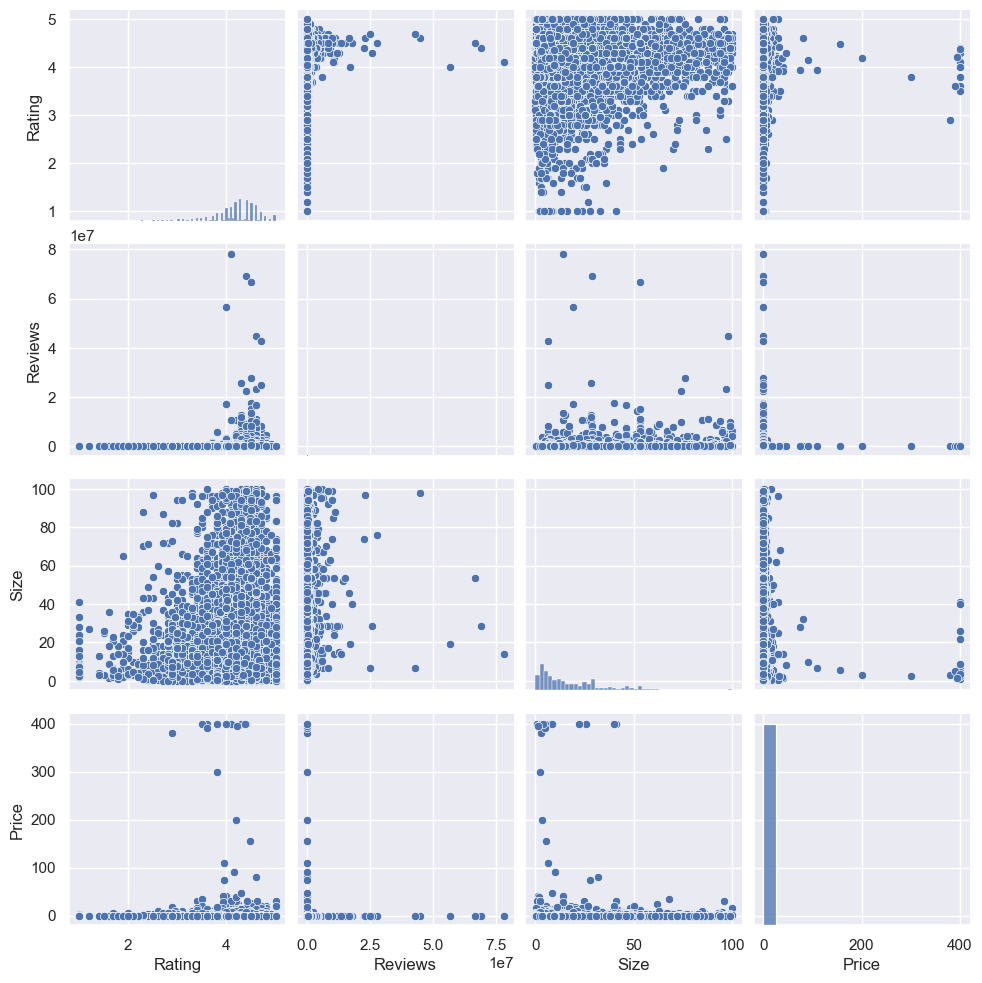

In [ ]:
sns.pairplot(df)

<Axes: >

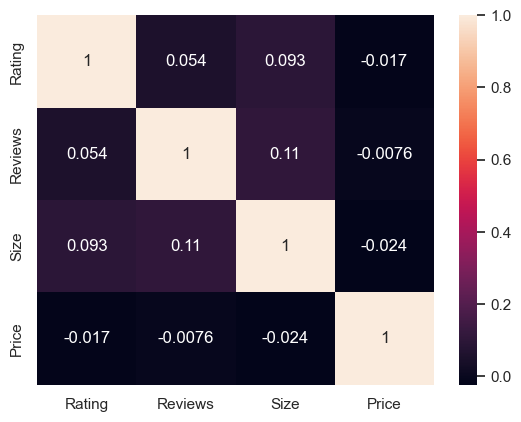

In [ ]:
sns.heatmap(df.corr(), annot=True)

## How many apps for each type for each content reading.


In [ ]:
x = pd.pivot_table(index='Type', columns='Content Rating', values='Rating', data=df, aggfunc='count')
x

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,3.0,7241.0,290.0,375.0,984.0,2.0
Paid,NaN,652.0,31.0,18.0,52.0,NaN


<Axes: xlabel='Content Rating', ylabel='Type'>

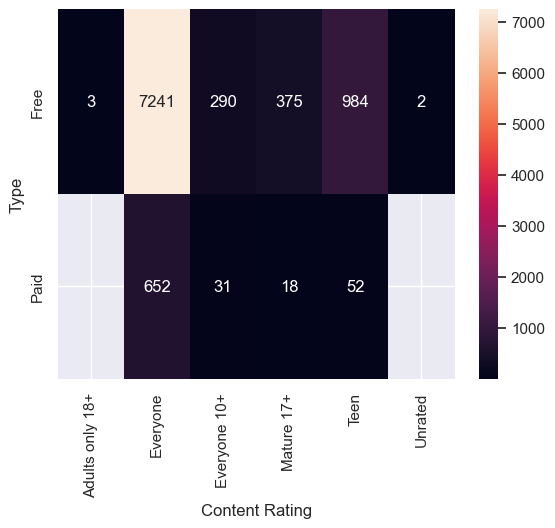

In [ ]:
sns.heatmap(x, annot=True, fmt='0.0f')

## How many apps that can work on android version 4


In [ ]:
df['is_working_on_ver_4'].value_counts()

Yes    6304
No     3344
Name: is_working_on_ver_4, dtype: int64

<Axes: xlabel='is_working_on_ver_4', ylabel='count'>

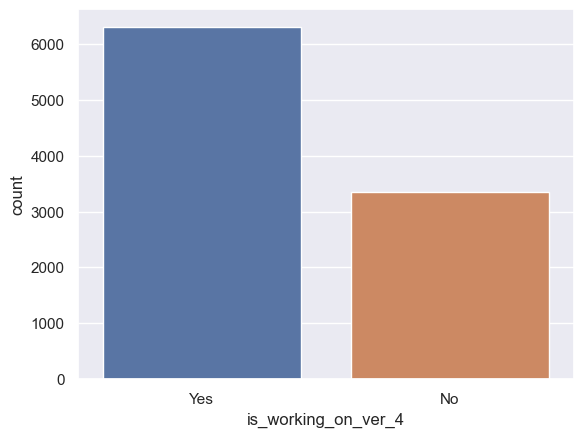

In [ ]:
sns.countplot(x='is_working_on_ver_4', data=df)

## Top 10 apps that has the most reviews

In [661]:
df.nlargest(10, 'Reviews')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_working_on_ver_4
2544,Facebook,social,4.1,78158306,14.12,"1,000,000,000+",Free,0.0,Teen,True
336,WhatsApp Messenger,communication,4.4,69119316,28.80,"1,000,000,000+",Free,0.0,Everyone,False
2545,Instagram,social,4.5,66577313,53.40,"1,000,000,000+",Free,0.0,Teen,True
335,Messenger – Text and Video Chat for Free,communication,4.0,56642847,19.32,"1,000,000,000+",Free,0.0,Everyone,True
1670,Clash of Clans,game,4.6,44891723,98.00,"100,000,000+",Free,0.0,Everyone 10+,True
4005,Clean Master- Space Cleaner & Antivirus,tools,4.7,42916526,6.46,"500,000,000+",Free,0.0,Everyone,False
1654,Subway Surfers,game,4.5,27722264,76.00,"1,000,000,000+",Free,0.0,Everyone 10+,True
3665,YouTube,video_players,4.3,25655305,28.40,"1,000,000,000+",Free,0.0,Teen,False
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",tools,4.7,24900999,6.46,"500,000,000+",Free,0.0,Everyone,True
1660,Clash Royale,game,4.6,23133508,97.00,"100,000,000+",Free,0.0,Everyone 10+,True


In [662]:
df.nlargest(10, 'Rating')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_working_on_ver_4
329,Hojiboy Tojiboyev Life Hacks,comics,5.0,15,37.0,"1,000+",Free,0.0,Everyone,True
612,American Girls Mobile Numbers,dating,5.0,5,4.4,"1,000+",Free,0.0,Mature 17+,True
615,Awake Dating,dating,5.0,2,70.0,100+,Free,0.0,Mature 17+,True
633,Spine- The dating app,dating,5.0,5,9.3,500+,Free,0.0,Teen,True
636,Girls Live Talk - Free Text and Video Chat,dating,5.0,6,5.0,100+,Free,0.0,Mature 17+,True
640,Online Girls Chat Group,dating,5.0,5,5.0,100+,Free,0.0,Mature 17+,True
654,Speeding Joyride & Car Meet App,dating,5.0,3,25.0,100+,Free,0.0,Mature 17+,True
1028,SUMMER SONIC app,events,5.0,4,61.0,500+,Free,0.0,Everyone,False
1030,Prosperity,events,5.0,16,2.3,100+,Free,0.0,Everyone,False
1038,Mindvalley U Tallinn 2018,events,5.0,1,21.0,100+,Free,0.0,Everyone,False


In [663]:
df.Installs.value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
Name: Installs, dtype: int64

In [664]:
df[df.Installs == '1,000,000,000+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_working_on_ver_4
152,Google Play Books,books_and_reference,3.9,1433233,8.520000,"1,000,000,000+",Free,0.0,Teen,True
335,Messenger – Text and Video Chat for Free,communication,4.0,56642847,19.320000,"1,000,000,000+",Free,0.0,Everyone,True
336,WhatsApp Messenger,communication,4.4,69119316,28.800000,"1,000,000,000+",Free,0.0,Everyone,False
338,Google Chrome: Fast & Secure,communication,4.3,9642995,28.400000,"1,000,000,000+",Free,0.0,Everyone,True
340,Gmail,communication,4.3,4604324,28.400000,"1,000,000,000+",Free,0.0,Everyone,False
341,Hangouts,communication,4.0,3419249,19.320000,"1,000,000,000+",Free,0.0,Everyone,False
391,Skype - free IM & video calls,communication,4.1,10484169,14.120000,"1,000,000,000+",Free,0.0,Everyone,True
865,Google Play Games,entertainment,4.3,7165362,28.400000,"1,000,000,000+",Free,0.0,Teen,True
1654,Subway Surfers,game,4.5,27722264,76.000000,"1,000,000,000+",Free,0.0,Everyone 10+,True
2544,Facebook,social,4.1,78158306,14.120000,"1,000,000,000+",Free,0.0,Teen,True
